==================================================

Final Project

Name: Nathaniel Andre, Emmanuel Gallant Sadenna Tibian, Hugo Jay Jasmin
Batch: hck-023

This final project is the culmination of phase 0, 1, and 2 materials. It aims to be an end to end process where the group retrieves data from a kaggle dataset, analyse it using EDA and other methods. It also asses the ability of the group to use data cleaning methods alongside feature engineering for use in the creation of a time serries and regression model, and one which can be optimized through hyperparameter optimization before deploying the finished product into hugging face.

======================================================


Background dataset:

The dataset is a synthetically produced set for use in analyzing and forecasting retail store inventory demand to ultimately minimize waste and idle stock. It contains over 73000 rows of daily data across multiple stores and products, including attributes like sales, inventory levels, pricing, weather, promotions, and holidays. 

Problem Statement:
How can the use of an end to end framework of data extracting, cleaning, modeling, optimizing, and deployment be used to advise a company's inventory management team in reducing overstocking in their warehouse and thus lost money through predicting upcoming demand with an efficacy of at least 80% allowing management to order as needed. A model which can do the following through model evaluation and picking alongside optimization and one which can be produced and also evaluated within the span of a week  

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Business Case:

Effective demand forecasting and restock recommendations directly impact a retailer’s bottom line by optimizing inventory management.

Improved Stock Availability: Accurate forecasting ensures that products are consistently available to meet customer demand, reducing lost sales from stockouts.

Minimized Overstocking: Predicting demand accurately allows retailers to avoid excess inventory, which ties up capital and incurs storage costs. Overstocking can also lead to markdowns if products don’t sell.

Operational Efficiency: Inventory managers can automate and streamline restocking decisions, reducing the workload for manual interventions. Efficient inventory levels can also optimize supply chain operations and reduce lead times.

Enhanced Customer Satisfaction: A reliable restocking process ensures that customers find the products they need, contributing to higher satisfaction, repeat business, and positive reviews.

By leveraging demand forecasting models and restocking recommendations, retailers can make data-driven decisions, reducing costs, improving profitability, and creating a more efficient supply chain that better aligns with customer demand. This will lead to increased competitiveness in the market and a more responsive, customer-centric business.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Key Deliverables:

Demand Forecasting Model: A model that predicts demand for each product at different stores across time. This could be based on time series forecasting methods, machine learning, or deep learning techniques. The model should capture seasonality, trends, and any other patterns in the data.

Restock Recommendation System: Based on the forecasted demand, a system that generates optimal restock recommendations for each product and store. The recommendations should suggest order quantities and timing, minimizing the risk of stockouts or overstocking.

## Library Importing

In [284]:
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns



## Data Loading

the following code reads the dataset

In [285]:
df = pd.read_csv('retail_store_inventory.csv')

### Data exploration

The following is prelimenary explorations for checks of eronious/problematic data.. Mising data/incorrect field types, and also to plan next steps

In [286]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

### Cleaning column header

In [287]:
df.columns = df.columns.str.replace(' ', '_').str.replace('/', 'or')

In [288]:
df.columns

Index(['Date', 'Store_ID', 'Product_ID', 'Category', 'Region',
       'Inventory_Level', 'Units_Sold', 'Units_Ordered', 'Demand_Forecast',
       'Price', 'Discount', 'Weather_Condition', 'HolidayorPromotion',
       'Competitor_Pricing', 'Seasonality'],
      dtype='object')

Printing out the first few data to see data structure

In [289]:
df.head()

,Date,Store_ID,Product_ID,Category,Region,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,HolidayorPromotion,Competitor_Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [290]:
df.tail()

,Date,Store_ID,Product_ID,Category,Region,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,HolidayorPromotion,Competitor_Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


from the following we can see that the date is sequential

In [291]:
df.nunique()

Date                    731
Store_ID                  5
Product_ID               20
Category                  5
Region                    4
Inventory_Level         451
Units_Sold              498
Units_Ordered           181
Demand_Forecast       31608
Price                  8999
Discount                  5
Weather_Condition         4
HolidayorPromotion        2
Competitor_Pricing     9751
Seasonality               4
dtype: int64

from the following we can see that the likely columns that are categorical are for Seasonality, HolidayorPromotion, Weather_Condition, Discount, Region, Category,  product ID and store ID

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store_ID            73100 non-null  object 
 2   Product_ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory_Level     73100 non-null  int64  
 6   Units_Sold          73100 non-null  int64  
 7   Units_Ordered       73100 non-null  int64  
 8   Demand_Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather_Condition   73100 non-null  object 
 12  HolidayorPromotion  73100 non-null  int64  
 13  Competitor_Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

from the following date is not datetime so we must change that

In [293]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce') 

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store_ID            73100 non-null  object        
 2   Product_ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory_Level     73100 non-null  int64         
 6   Units_Sold          73100 non-null  int64         
 7   Units_Ordered       73100 non-null  int64         
 8   Demand_Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather_Condition   73100 non-null  object        
 12  HolidayorPromotion  73100 non-null  int64         
 13  Competitor_Pricing  73100 non-null  float64   

In [295]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Inventory_Level,73100.0,274.47,129.95,50.00,162.00,273.00,387.00,500.00
Units_Sold,73100.0,136.46,108.92,0.00,49.00,107.00,203.00,499.00
Units_Ordered,73100.0,110.00,52.28,20.00,65.00,110.00,155.00,200.00
Demand_Forecast,73100.0,141.49,109.25,-9.99,53.67,113.02,208.05,518.55
Price,73100.0,55.14,26.02,10.00,32.65,55.05,77.86,100.00
Discount,73100.0,10.01,7.08,0.00,5.00,10.00,15.00,20.00
HolidayorPromotion,73100.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Competitor_Pricing,73100.0,55.15,26.19,5.03,32.68,55.01,77.82,104.94


from the following we see an issue with demand forecase that it has negative

In [296]:
df['Demand_Forecast'] = df['Demand_Forecast'].where(df['Demand_Forecast'] >= 0, 0)

In [297]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Inventory_Level,73100.0,274.47,129.95,50.00,162.00,273.00,387.00,500.00
Units_Sold,73100.0,136.46,108.92,0.00,49.00,107.00,203.00,499.00
Units_Ordered,73100.0,110.00,52.28,20.00,65.00,110.00,155.00,200.00
Demand_Forecast,73100.0,141.53,109.21,0.00,53.67,113.02,208.05,518.55
Price,73100.0,55.14,26.02,10.00,32.65,55.05,77.86,100.00
Discount,73100.0,10.01,7.08,0.00,5.00,10.00,15.00,20.00
HolidayorPromotion,73100.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Competitor_Pricing,73100.0,55.15,26.19,5.03,32.68,55.01,77.82,104.94


since there are 73000 cases if we were to do daily, compressing it to weekly might be visually more readable 

copying the original dataframe

In [298]:
weekly_df = df.copy()

setting index to date

In [299]:
weekly_df.set_index('Date', inplace= True)

segregating the stores since we want to only do an in depth analysis on 1 store and product due to time constrictions, although technically analysis of all products is possible given requirements and time

In [300]:

store1=weekly_df[weekly_df["Store_ID"]=="S001"]
store2=weekly_df[weekly_df["Store_ID"]=="S002"]
store3=weekly_df[weekly_df["Store_ID"]=="S003"]
store4=weekly_df[weekly_df["Store_ID"]=="S004"]
store5=weekly_df[weekly_df["Store_ID"]=="S005"]

selecting store 1 only due to time constriction

In [301]:
data=store1 

data.count()


Store_ID              14620
Product_ID            14620
Category              14620
Region                14620
Inventory_Level       14620
Units_Sold            14620
Units_Ordered         14620
Demand_Forecast       14620
Price                 14620
Discount              14620
Weather_Condition     14620
HolidayorPromotion    14620
Competitor_Pricing    14620
Seasonality           14620
dtype: int64

grouping by products for that day

In [302]:
sp1 = data.groupby(['Date','Product_ID']).sum()
sp1


Inventory_Level  Units_Sold  Units_Ordered  \
Date       Product_ID                                               
2022-01-01 P0001                   231         127             55   
           P0002                   204         150             66   
           P0003                   102          65             51   
           P0004                   469          61            164   
           P0005                   166          14            135   
...                                ...         ...            ...   
2024-01-01 P0016                    74          13            189   
           P0017                   282         186             61   
           P0018                   191          29             95   
           P0019                   149         145             85   
           P0020                   242          52            198   

                       Demand_Forecast  Price  Discount  HolidayorPromotion  \
Date       Product_ID                                                         
2022-01-01 P0001                135.47  33.50        20                   0   
           P0002                144.04  63.01        20                   0   
           P0003                 74.02  27.99        10                   1   
           P0004                 62.18  32.72        10                   1   
           P0005                  9.26  73.64         0                   0   
...                                ...    ...       ...                 ...   
2024-01-01 P0016                 27.53  40.61        10                   1   
           P0017                201.40  20.68         0                   0   
           P0018                 25.01  24.10         5                   1   
           P0019                154.83  81.71        20                   0   
           P0020                 50.82  11.00         0                   0   

                       Competitor_Pricing  
Date       Product_ID                      
2022-01-01 P0001                    29.69  
           P0002                    66.16  
           P0003                    31.32  
           P0004                    34.74  
           P0005                    68.95  
...                                   ...  
2024-01-01 P0016                    35.76  
           P0017                    17.23  
           P0018                    23.13  
           P0019                    80.86  
           P0020                     7.46  

[14620 rows x 8 columns]

selecting only product with ID 1 since we dont have time to analyze all

In [303]:
sp1_filtered = sp1.loc[sp1.index.get_level_values('Product_ID') == 'P0001']
sp1_filtered


,,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,HolidayorPromotion,Competitor_Pricing
Date,Product_ID,,,,,,,,
2022-01-01,P0001,231,127,55,135.47,33.50,20,0,29.69
2022-01-02,P0001,116,81,104,92.94,27.95,10,0,30.89
2022-01-03,P0001,154,5,189,5.36,62.70,20,0,58.22
2022-01-04,P0001,85,58,193,52.87,77.88,15,1,75.99
2022-01-05,P0001,238,147,37,150.27,28.46,20,1,29.40
...,...,...,...,...,...,...,...,...,...
2023-12-28,P0001,104,67,64,78.15,77.61,0,1,78.00
2023-12-29,P0001,224,168,35,184.45,14.01,15,1,18.51
2023-12-30,P0001,208,30,167,20.66,57.00,10,0,54.92


reseting the product id index since we already filtered

In [304]:
sp1_filtered_reset = sp1_filtered.reset_index(level='Product_ID', drop=True)

sp1_filtered_reset

,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,HolidayorPromotion,Competitor_Pricing
Date,,,,,,,,
2022-01-01,231,127,55,135.47,33.50,20,0,29.69
2022-01-02,116,81,104,92.94,27.95,10,0,30.89
2022-01-03,154,5,189,5.36,62.70,20,0,58.22
2022-01-04,85,58,193,52.87,77.88,15,1,75.99
2022-01-05,238,147,37,150.27,28.46,20,1,29.40
...,...,...,...,...,...,...,...,...
2023-12-28,104,67,64,78.15,77.61,0,1,78.00
2023-12-29,224,168,35,184.45,14.01,15,1,18.51
2023-12-30,208,30,167,20.66,57.00,10,0,54.92


grouping so the interval is weekly and not daily

In [305]:
Weekly_Demand = sp1_filtered_reset.resample('W').sum()


In [306]:
Weekly_Demand

,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,HolidayorPromotion,Competitor_Pricing
Date,,,,,,,,
2022-01-02,347,208,159,228.41,61.45,30,0,60.58
2022-01-09,1474,706,977,718.59,422.10,90,5,412.21
2022-01-16,1276,686,1031,712.51,369.88,70,4,374.38
2022-01-23,2056,1142,1051,1179.51,417.71,55,3,417.41
2022-01-30,1883,685,740,747.78,457.95,80,5,463.72
...,...,...,...,...,...,...,...,...
2023-12-10,1561,904,559,963.89,408.44,30,4,415.08
2023-12-17,1528,805,989,908.22,398.86,100,2,399.27
2023-12-24,2662,1285,666,1309.76,258.88,70,5,250.47


since holiday or promotion is binary, and after summing it is not, what we can do is check if a week hhas a promotion or not and do 1 or 0 respectively

In [307]:
Weekly_Demand['HolidayorPromotion'] = Weekly_Demand['HolidayorPromotion'].where(Weekly_Demand['HolidayorPromotion'] == 0, 1)

In [308]:
Weekly_Demand.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Inventory_Level,106.0,1881.46,434.26,223.00,1620.50,1883.00,2110.50,2917.00
Units_Sold,106.0,946.90,291.83,40.00,759.25,953.00,1140.75,1574.00
Units_Ordered,106.0,759.48,151.21,93.00,685.50,763.00,851.75,1051.00
Demand_Forecast,106.0,986.91,292.78,53.56,792.23,1010.94,1195.60,1604.36
Price,106.0,379.69,84.10,55.26,329.02,389.76,434.34,566.95
Discount,106.0,68.73,19.70,15.00,55.00,70.00,80.00,105.00
HolidayorPromotion,106.0,0.97,0.17,0.00,1.00,1.00,1.00,1.00
Competitor_Pricing,106.0,380.63,84.17,59.37,331.58,393.88,433.85,571.32


## EDA

In [309]:
Weekly_Demand = Weekly_Demand.reset_index()

checking columns

In [310]:
Weekly_Demand.columns

Index(['Date', 'Inventory_Level', 'Units_Sold', 'Units_Ordered',
       'Demand_Forecast', 'Price', 'Discount', 'HolidayorPromotion',
       'Competitor_Pricing'],
      dtype='object')

dropping all columns except target and date columns for time series dataframe

In [311]:
Weekly_Demand_time_series = Weekly_Demand.drop(['Inventory_Level', 'Demand_Forecast', 'Units_Ordered','Price', 'Discount', 'HolidayorPromotion','Competitor_Pricing'], axis= 1)

In [312]:
Weekly_Demand_time_series

,Date,Units_Sold
0,2022-01-02,208
1,2022-01-09,706
2,2022-01-16,686
3,2022-01-23,1142
4,2022-01-30,685
...,...,...
101,2023-12-10,904
102,2023-12-17,805
103,2023-12-24,1285
104,2023-12-31,619


plotting units sold against the date

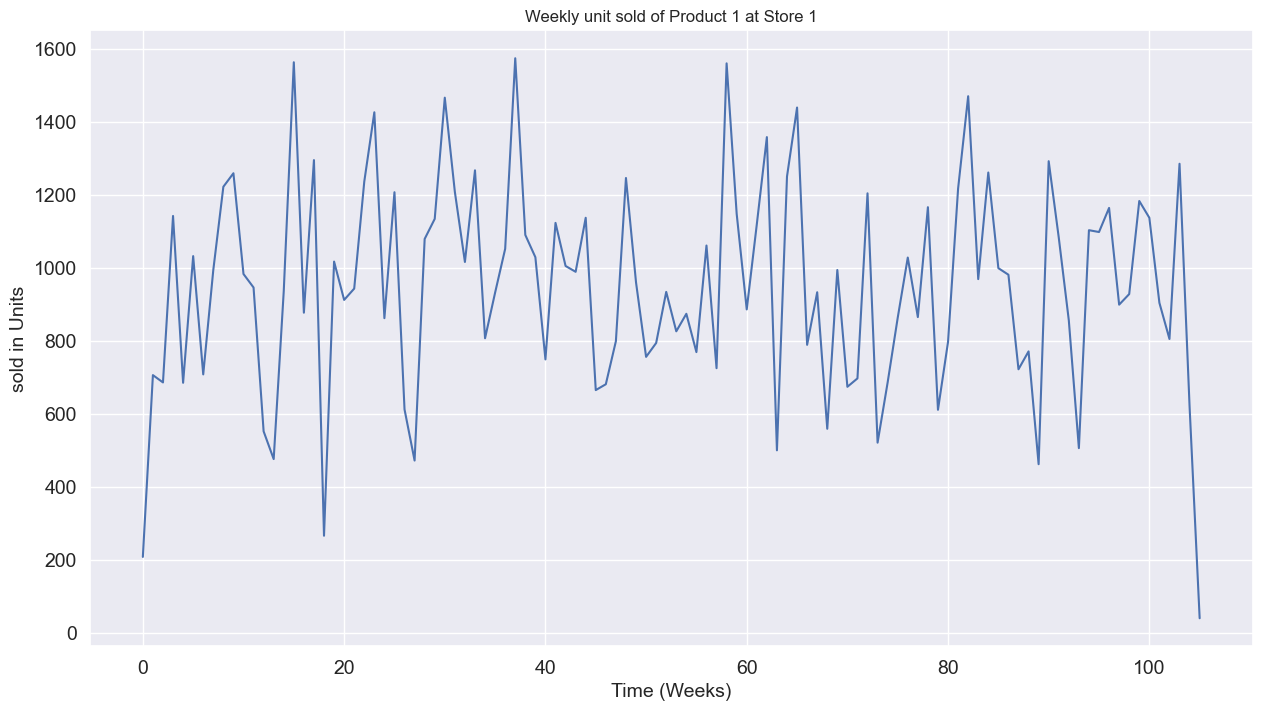

In [313]:
Weekly_Demand_time_series.Units_Sold.plot(figsize=(15,8), title= 'Weekly unit sold of Product 1 at Store 1', fontsize=14)

plt.xlabel('Time (Weeks)', fontsize=14)  
plt.ylabel('sold in Units', fontsize=14) 

plt.show()

    The graph shows how demand fluctuates for product 1 over time. It can be inferred that the demand of the products fluctuate wildly in between weeks with the average being about 1000 units sold. A reason could be due to the product being produce meaning people might buy it when it is restocked at certain dates for freshness.


### Feature Importance 

the following code scales the numerical data, since we dont have categorical needing to be encoded, we only need to use minmax

In [316]:

Weekly_Demand_prescale = Weekly_Demand.copy()
columns_to_scale = ['Inventory_Level', 'Demand_Forecast', 'Units_Ordered', 'Price', 'Discount', 'Competitor_Pricing']

scaler = MinMaxScaler()
Weekly_Demand[columns_to_scale] = scaler.fit_transform(Weekly_Demand[columns_to_scale])


In [317]:
Weekly_Demand

,Date,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,HolidayorPromotion,Competitor_Pricing
0,2022-01-02,0.046028,208,0.068894,0.112748,0.012097,0.166667,0,0.002364
1,2022-01-09,0.464365,706,0.922756,0.428830,0.716918,0.833333,1,0.689208
2,2022-01-16,0.390869,686,0.979123,0.424910,0.614864,0.611111,1,0.615314
3,2022-01-23,0.680401,1142,1.000000,0.726045,0.708339,0.444444,1,0.699365
4,2022-01-30,0.616184,685,0.675365,0.447653,0.786980,0.722222,1,0.789823
...,...,...,...,...,...,...,...,...,...
101,2023-12-10,0.496659,904,0.486430,0.587007,0.690223,0.166667,1,0.694814
102,2023-12-17,0.484410,805,0.935282,0.551109,0.671500,0.944444,1,0.663932
103,2023-12-24,0.905345,1285,0.598121,0.810034,0.397936,0.611111,1,0.373279
104,2023-12-31,0.439866,619,0.574113,0.402624,0.438293,0.444444,1,0.443227


the code below shows the feature importance for how each feature affects the target(units sold) to be used in regression

Text(0.5, 0, 'Feature Importance')

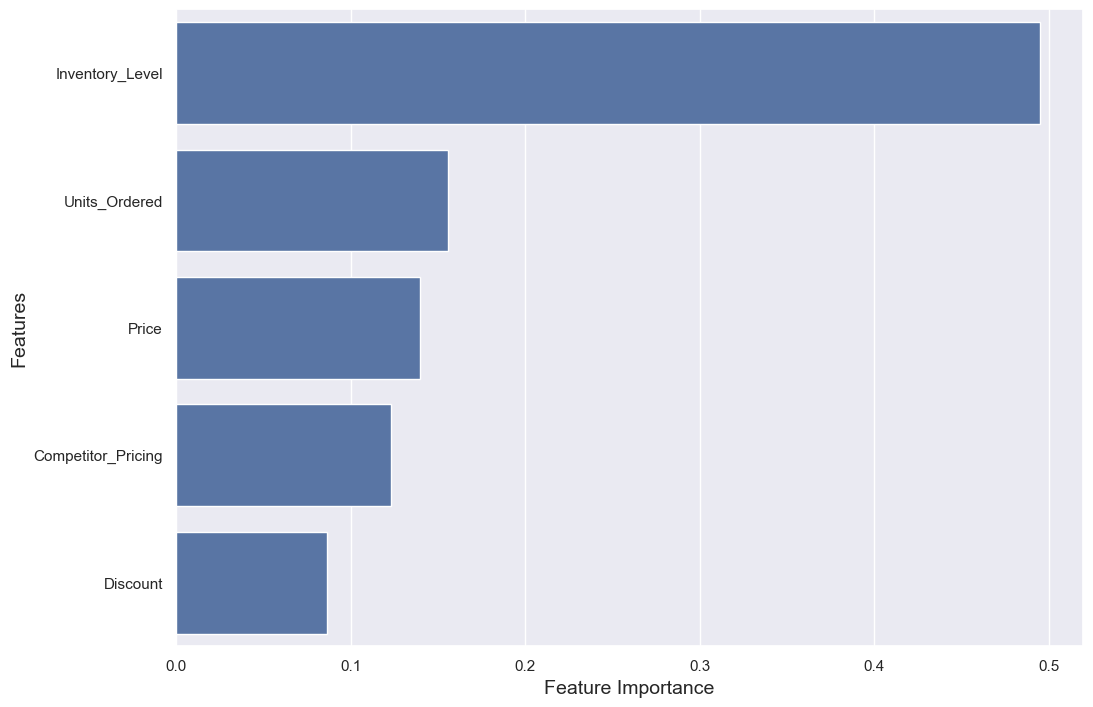

In [318]:
X = Weekly_Demand.drop(['Date','Demand_Forecast', 'Units_Sold', 'HolidayorPromotion'], axis= 1)
y = Weekly_Demand.drop(['Inventory_Level', 'Demand_Forecast', 'Units_Ordered','Price', 'Discount', 'HolidayorPromotion','Competitor_Pricing', 'Date'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


clf = DecisionTreeRegressor(criterion='friedman_mse')  
clf = clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names, )
plt.ylabel("Features", fontsize=14)  

plt.xlabel("Feature Importance", fontsize=14)



This plot highlights the most significant features contributing to the demand forecasting model. 
Inventory levels dominate in importance, followed by price, unit orders, competitor pricing, and discounts.
The reason why inventory level is the highest is because it follows the units sold 

We want to check if were understocked or overstocked for a product

In [319]:
Weekly_Demand.columns

Index(['Date', 'Inventory_Level', 'Units_Sold', 'Units_Ordered',
       'Demand_Forecast', 'Price', 'Discount', 'HolidayorPromotion',
       'Competitor_Pricing'],
      dtype='object')

the code below compares how units sold is compared to inventory, we can see how overstocked we are using this

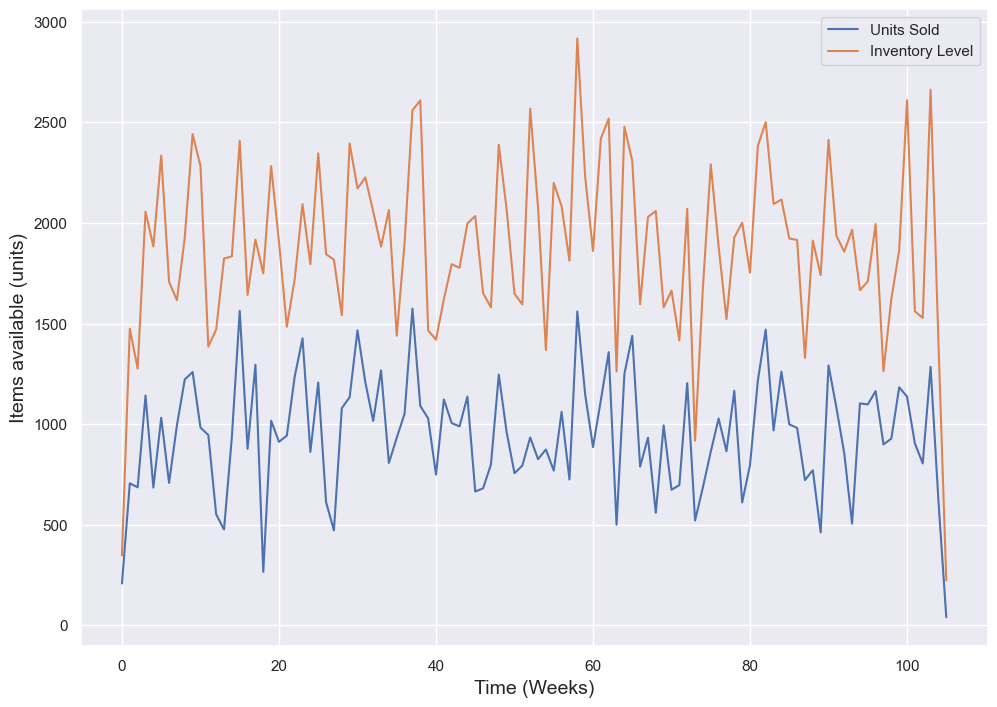

In [320]:
plt.plot(Weekly_Demand_prescale['Units_Sold'], label='Units Sold')
plt.plot(Weekly_Demand_prescale['Inventory_Level'], label='Inventory Level')

plt.xlabel('Time (Weeks)', fontsize=14)  
plt.ylabel('Items available (units)', fontsize=14) 

plt.legend()


from the following we can see that we are quite overstocked, lets now see how overstocked we are in numerical terms. The code below finds the difference between the inventory levels and units sold

In [321]:
Weekly_Demand_prescale['stock_difference'] = Weekly_Demand_prescale['Inventory_Level'] - Weekly_Demand_prescale['Units_Sold']

In [322]:
Weekly_Demand_prescale

,Date,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,HolidayorPromotion,Competitor_Pricing,stock_difference
0,2022-01-02,347,208,159,228.41,61.45,30,0,60.58,139
1,2022-01-09,1474,706,977,718.59,422.10,90,1,412.21,768
2,2022-01-16,1276,686,1031,712.51,369.88,70,1,374.38,590
3,2022-01-23,2056,1142,1051,1179.51,417.71,55,1,417.41,914
4,2022-01-30,1883,685,740,747.78,457.95,80,1,463.72,1198
...,...,...,...,...,...,...,...,...,...,...
101,2023-12-10,1561,904,559,963.89,408.44,30,1,415.08,657
102,2023-12-17,1528,805,989,908.22,398.86,100,1,399.27,723
103,2023-12-24,2662,1285,666,1309.76,258.88,70,1,250.47,1377
104,2023-12-31,1408,619,643,677.95,279.53,55,1,286.28,789


from the following we can see that we are quite overstocked as the stock difference(discrepency between stock avaiable and the one actually being bought is quite high)

resampling to averaging for a week for the field of price so we can analyse how much the weekly price of a product is

In [323]:

Weekly_Price = sp1_filtered_reset.resample('W').mean()
Weekly_Price = Weekly_Price.reset_index().head()


In [324]:
Weekly_Price

,Date,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,HolidayorPromotion,Competitor_Pricing
0,2022-01-02,173.500000,104.000000,79.500000,114.205000,30.725000,15.000000,0.000000,30.290000
1,2022-01-09,210.571429,100.857143,139.571429,102.655714,60.300000,12.857143,0.714286,58.887143
2,2022-01-16,182.285714,98.000000,147.285714,101.787143,52.840000,10.000000,0.571429,53.482857
3,2022-01-23,293.714286,163.142857,150.142857,168.501429,59.672857,7.857143,0.428571,59.630000
4,2022-01-30,269.000000,97.857143,105.714286,106.825714,65.421429,11.428571,0.714286,66.245714


since it looks like we have quite a big issue with overstocking, lets see how much revenue we lose due to it taking a usually 50% markup from https://smallbusiness.chron.com/normal-markup-percentage-80750.html

the following checks how much money we spent overall on unused stock

In [325]:
((Weekly_Demand_prescale['stock_difference'] * Weekly_Price['Price']).sum())/150*100

143115.09190476188

the following checks how much money we spent on average in a week on unused stock

In [326]:
((Weekly_Demand_prescale['stock_difference'] * Weekly_Price['Price']).sum()/106)/150*100

1350.1423764600179

## EDA Conclusions

From the following, some key takeaways are that we are very overstocked, meaning we have a lot of idle money spent on unused products. Due to this we spent a total of 1350 dollars a week for the product, and in the year about 143000 dollars have been wasted on this product on this one store. We also found that the highest contributor to the sales of a product is its price excluding dependent features like stock availability and units ordered. Meaning that if any management is in attendence, they should consider tweaking the price of the product to spur in demand

### Check for missing Values

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store_ID            73100 non-null  object        
 2   Product_ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory_Level     73100 non-null  int64         
 6   Units_Sold          73100 non-null  int64         
 7   Units_Ordered       73100 non-null  int64         
 8   Demand_Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather_Condition   73100 non-null  object        
 12  HolidayorPromotion  73100 non-null  int64         
 13  Competitor_Pricing  73100 non-null  float64   

from the following there seems to be no null instance so we can move on.